In [ ]:
!pip install pandas openpyxl


In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data1=pd.read_excel('Online Retail.xlsx')
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Getting basic information about data

In [13]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
data1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [15]:
data1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
data1.size

4335272

In [19]:
data1.shape

(541909, 8)

In [22]:
data1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [25]:
data1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# Convert invoice_date to datetime format

In [52]:

data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])


# Remove duplicates

In [ ]:
data1 = data1.drop_duplicate

# Handle missing values

In [ ]:
data1= data1.dropna(subset=['CustomerID', 'InvoiceDate', 'UnitPrice', 'Quantity'])

# Remove outliers in quantity and unit price

In [ ]:
data1 = data1[(data1['Quantity'] > 0) & (data1['UnitPrice'] > 0)]

In [51]:

data1['total_spending'] = data1['Quantity'] * data1['UnitPrice']
tenure = data1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days}).rename(columns={'InvoiceDate': 'tenure'})
frequency = data1.groupby('CustomerID').agg({'InvoiceDate': 'count'}).rename(columns={'InvoiceDate': 'frequency'})
monetary = data1.groupby('CustomerID').agg({'total_spending': 'sum'}).rename(columns={'total_spending': 'monetary'})
recency = data1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data1['InvoiceDate'].max() - x.max()).days}).rename(columns={'InvoiceDate': 'recency'})
customer_data = tenure.join(frequency).join(monetary).join(recency).reset_index()
customer_data['avg_purchase_value'] = customer_data['monetary'] / customer_data['frequency']
customer_data.head()



,CustomerID,tenure,frequency,monetary,recency,avg_purchase_value
0,12346.0,0,1,77183.60,325,77183.600000
1,12347.0,365,182,4310.00,1,23.681319
2,12348.0,282,31,1797.24,74,57.975484
3,12349.0,0,73,1757.55,18,24.076027
4,12350.0,0,17,334.40,309,19.670588


# Visualize the distribution of customer spending

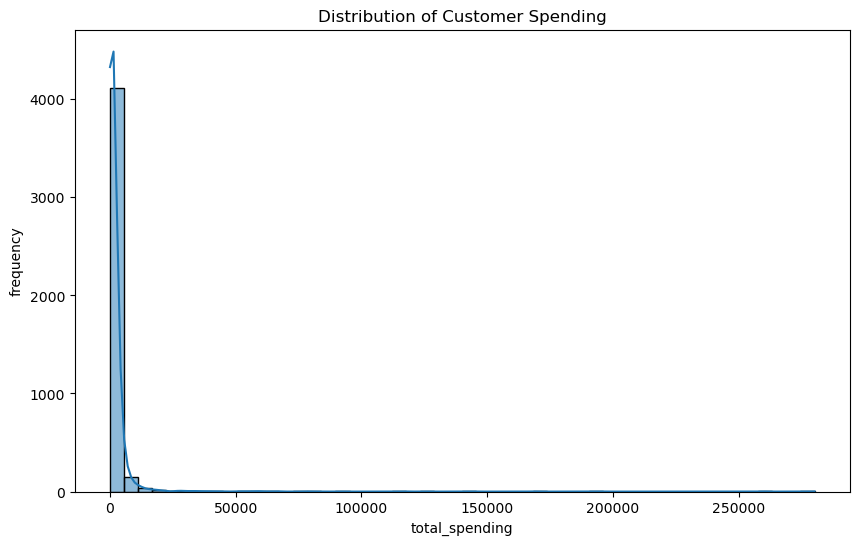

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['monetary'], bins=50, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('total_spending')
plt.ylabel('frequency')
plt.show()




# Visualize correlations between features

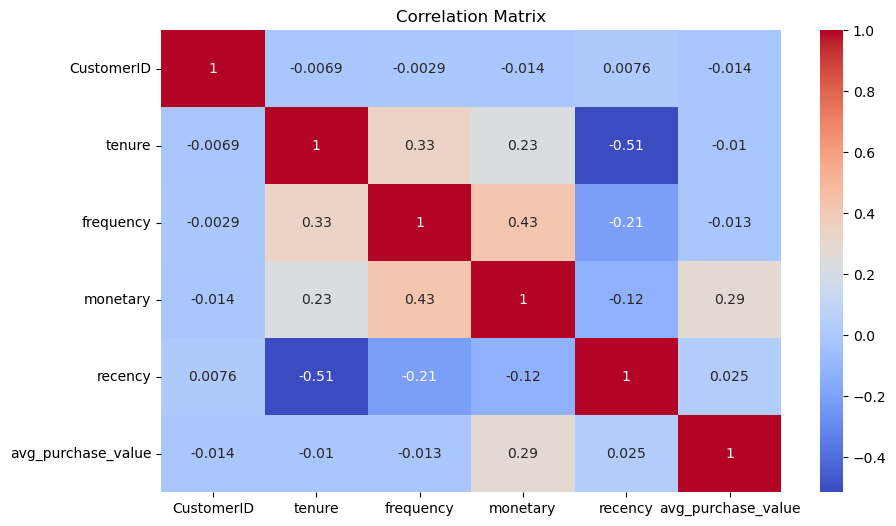

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Splitting Data

In [56]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = customer_data[['tenure', 'frequency', 'recency', 'avg_purchase_value']]
y = customer_data['monetary']

# Split the data into training and testing sets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3470, 4)
Testing set size: (868, 4)


# Model Selection and Training

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models

In [59]:
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

In [60]:
linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
linear_pred = linear_reg.predict(X_test)
tree_pred = tree_reg.predict(X_test)
forest_pred = forest_reg.predict(X_test)

# Evaluate the models

In [62]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

linear_mae, linear_mse, linear_r2 = evaluate_model(y_test, linear_pred)
tree_mae, tree_mse, tree_r2 = evaluate_model(y_test, tree_pred)
forest_mae, forest_mse, forest_r2 = evaluate_model(y_test, forest_pred)

print(f"Linear Regression - MAE: {linear_mae}, MSE: {linear_mse}, R2: {linear_r2}")
print(f"Decision Tree - MAE: {tree_mae}, MSE: {tree_mse}, R2: {tree_r2}")
print(f"Random Forest - MAE: {forest_mae}, MSE: {forest_mse}, R2: {forest_r2}")

Linear Regression - MAE: 1812.4788270070285, MSE: 103815266.21872053, R2: -0.014592093758423852
Decision Tree - MAE: 529.1748271889401, MSE: 21852567.653129146, R2: 0.7864336992357697
Random Forest - MAE: 488.28929564516136, MSE: 31956509.54383041, R2: 0.6876873401357295


# Model Interpretation

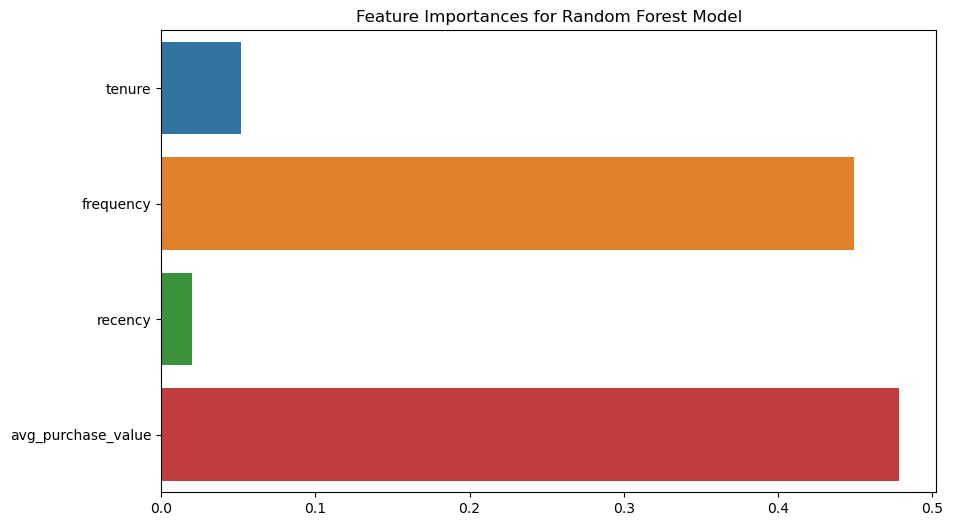

In [63]:
# Display feature importances for Random Forest model
importances = forest_reg.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances for Random Forest Model')
plt.show()


# Deployment

In [67]:
import streamlit as st

# Create a simple Streamlit app for predicting customer lifetime value
st.title("Customer Lifetime Value Prediction")

# Input fields for user data
tenure = st.number_input("Customer Tenure (days)", min_value=0)
frequency = st.number_input("Number of Purchases", min_value=0)
recency = st.number_input("Recency (days)", min_value=0)
avg_purchase_value = st.number_input("Average Purchase Value", min_value=0.0)

# Button to make predictions
if st.button("Predict Lifetime Value"):
    user_data = [[tenure, frequency, recency, avg_purchase_value]]
    prediction = forest_reg.predict(user_data)
    st.write(f"Predicted Lifetime Value: ${prediction[0]:.2f}")
